<a href="https://colab.research.google.com/github/gauriagarwal18/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/master/Netflix_Movies_And_Tv_Shows_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



## **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

##Reading Data And Importing Libraries Required For Analysis


**We are using the following libraries for analysis:**
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data cleaning and for preparing data for analysis

- matplotlib,seaborn: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [1]:
!pip install nltk              #for natural language processing tasks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#required libraries
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
import string
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
#importing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/AlmaBetter_Capstone_projects/capstone_project4/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_original = pd.read_csv(path,parse_dates=[6],na_values="")

In [5]:
netflix = netflix_original.copy()

In [6]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


INFERENCE: To remove the null values we will first perform feature engineering.

In [8]:
netflix.describe(include = 'all') 

<ipython-input-8-d899a5d85194>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  netflix.describe(include = 'all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1512,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,119,NaN,2863,1608,334,3
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN


From above we note that:
Cast column have many names and no single name is specified also we have to compare between movies and tv shows not between different casts, so will drop this column

##Data cleaning and Feature Engineering

In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


columns with null values: director, cast, country, date_added, rating

In [10]:
(netflix["director"].value_counts())
#here we note that we have total 4049 different directors so this column is not important for us.

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [11]:
(netflix["cast"].value_counts())
#here we note that we have total 6831 different sets of casts so this column is also not important for us.

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [12]:
#null values in country
(netflix["country"].value_counts())
#here we note that we have total 4049 different directors so this column is not important for us.

"""
we note that some countries are very dominant and so we will replace the null values in the country column with united states assuming that 
as most of the entries are of us so their is a higher probability that those missing entries are also of us.
"""

'\nwe note that some countries are very dominant and so we will replace the null values in the country column with united states assuming that \nas most of the entries are of us so their is a higher probability that those missing entries are also of us.\n'

In [13]:
print(pd.crosstab(netflix["country"],netflix["type"]).sort_values(by="Movie",ascending=False))
print("\n\n\n\n")
print(pd.crosstab(netflix["country"],netflix["type"]).sort_values(by="TV Show",ascending=False))


type                             Movie  TV Show
country                                        
United States                     1850      705
India                              852       71
United Kingdom                     193      204
Canada                             118       59
Egypt                               89       12
...                                ...      ...
China, United Kingdom                0        1
Colombia, Mexico, United States      0        2
Colombia, United States              0        1
Croatia                              0        1
United States, France, Canada        0        1

[681 rows x 2 columns]





type                                                Movie  TV Show
country                                                           
United States                                        1850      705
United Kingdom                                        193      204
Japan                                                  69      157
South Korea 

In [14]:
#null values in rating column
(netflix["rating"].value_counts())

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [15]:
print(pd.crosstab(netflix["rating"],netflix["type"]).sort_values(by="Movie",ascending=False))
print("\n\n\n\n")
print(pd.crosstab(netflix["rating"],netflix["type"]).sort_values(by="TV Show",ascending=False))

#Here we note that for both movies and TV shows the rating which had appeared maxiimum number of times is TV-MA so we will replace null value with this

type      Movie  TV Show
rating                  
TV-MA      1845     1018
TV-14      1272      659
R           663        2
TV-PG       505      301
PG-13       386        0
PG          247        0
TV-Y        117      163
TV-G        111       83
TV-Y7        95      176
NR           79        5
G            39        0
TV-Y7-FV      5        1
UR            5        0
NC-17         3        0





type      Movie  TV Show
rating                  
TV-MA      1845     1018
TV-14      1272      659
TV-PG       505      301
TV-Y7        95      176
TV-Y        117      163
TV-G        111       83
NR           79        5
R           663        2
TV-Y7-FV      5        1
G            39        0
NC-17         3        0
PG          247        0
PG-13       386        0
UR            5        0


###removing null values from date time column
note that in date only year and month is imporatant but the day is not so:

we will first divide the date time column into three columns using feature engineering.
Then we will add only two new columns for month and year and remove null values from other two columns accordingly.

In [16]:
from datetime import datetime
from datetime import date

In [17]:
def separate_date(date_time):
  years,months,dates=[],[],[]
  for i in date_time:
    years.append(i.year)
    months.append(i.month)
    dates.append(i.day)
  return years,months,dates
  

In [18]:
years,months,dates=separate_date(netflix["date_added"])
netflix["year_added"]=years
netflix["month_added"]=months

Here I am dropping some columns:

- director, casts: as mentioned earlier they are not useful for analysis.
- date_added: we made two new columns from this, which are more useful.
- show_id: It is just an id for show and it is different for every entry so it is also not important in our analysis.



In [19]:
netflix.drop(["director","date_added","show_id", "cast"], axis=1, inplace=True)
#now I droppped some columns

In [20]:
count_replace=["country","rating","year_added","month_added"]  #these the columns having null values.

###Now to remove null values from the above mentioned columns:
I will replace the null value with most frequently occuring value in that column,
but before that I will make assure that the value in occuring frrequntly in case of both "Tv shows" and "Movie"

In [21]:
netflix_shows= netflix[netflix["type"]=="TV Show"]
netflix_movies=netflix[netflix["type"]=="Movie"]

In [22]:
for col in count_replace:
  print(f"\n\n\n\nfor {col} : \n")
  print(f"Value repeating maximum times in case of tv shows: ",netflix_shows[col].value_counts().index[0])
  print(f"Value repeating maximum times in case of movies: ",netflix_movies[col].value_counts().index[0])






for country : 

Value repeating maximum times in case of tv shows:  United States
Value repeating maximum times in case of movies:  United States




for rating : 

Value repeating maximum times in case of tv shows:  TV-MA
Value repeating maximum times in case of movies:  TV-MA




for year_added : 

Value repeating maximum times in case of tv shows:  2020.0
Value repeating maximum times in case of movies:  2019.0




for month_added : 

Value repeating maximum times in case of tv shows:  12.0
Value repeating maximum times in case of movies:  1.0


Inference: We note that the repeating values are not always same for TV show and movies

In [23]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          7787 non-null   object 
 1   title         7787 non-null   object 
 2   country       7280 non-null   object 
 3   release_year  7787 non-null   int64  
 4   rating        7780 non-null   object 
 5   duration      7787 non-null   object 
 6   listed_in     7787 non-null   object 
 7   description   7787 non-null   object 
 8   year_added    7777 non-null   float64
 9   month_added   7777 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 608.5+ KB


In [24]:
"""netflix.set_value((netflix["type"]=="TV Show"),"month_added", 10)
netflix.at[(netflix["type"]=="TV Show"),"month_added"].fillna(12,inplace=True)"""

'netflix.set_value((netflix["type"]=="TV Show"),"month_added", 10)\nnetflix.at[(netflix["type"]=="TV Show"),"month_added"].fillna(12,inplace=True)'

In [25]:
netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          7787 non-null   object 
 1   title         7787 non-null   object 
 2   country       7280 non-null   object 
 3   release_year  7787 non-null   int64  
 4   rating        7780 non-null   object 
 5   duration      7787 non-null   object 
 6   listed_in     7787 non-null   object 
 7   description   7787 non-null   object 
 8   year_added    7777 non-null   float64
 9   month_added   7777 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 608.5+ KB


In [26]:

#now we note that all the features in our data are numerical
count_replace

['country', 'rating', 'year_added', 'month_added']

In [27]:
def print_null_percent(df):
  null_percent=pd.Series()
  for col in df.columns:
    null_percent[col]=((df.shape[0]-df[col].count())/(df.shape[0]))*100
  print("columns with null values\n",null_percent[null_percent!=0])

In [28]:

def cleaning(df,continuous_col=[],discrete_col=[],print_null=True,th=20.0):
  """
  this function removes all the null values from the data 
  """

  print(f"before cleaning\n")
  print(f"shape of data: {df.shape}")
  if(print_null):
    print_null_percent(df)
  
  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  #step2
  df.drop_duplicates(inplace=True,ignore_index=True)
  

  #step3
  #removing all the null values
  for c1 in df.columns:

    #i.e it is an non catagorical column
    if c1 in continuous_col: 
      df[c1].fillna(df[c1].mean(),inplace=True)
    else:
      df[c1].fillna(df[c1].value_counts().idxmax(),inplace=True)

  print(f"\n\nAfter cleaning the data\n")
  print(f"shape of data: {df.shape}")
  print_null_percent(df)
  return df

In [29]:
netflix_shows=cleaning(netflix_shows,[],count_replace,th=20)

before cleaning

shape of data: (2410, 10)
columns with null values
 country        11.493776
rating          0.082988
year_added      0.414938
month_added     0.414938
dtype: float64


After cleaning the data

shape of data: (2410, 10)
columns with null values
 Series([], dtype: float64)


<ipython-input-27-530123f6daa5>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  null_percent=pd.Series()
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
netflix_movies=cleaning(netflix_movies,[],count_replace,th=20)

before cleaning

shape of data: (5377, 10)
columns with null values
 country    4.277478
rating     0.092989
dtype: float64


After cleaning the data

shape of data: (5377, 10)
columns with null values
 Series([], dtype: float64)


<ipython-input-27-530123f6daa5>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  null_percent=pd.Series()


In [31]:
netflix=pd.concat([netflix_shows,netflix_movies])
netflix

,type,title,country,release_year,rating,duration,listed_in,description,year_added,month_added
0,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,TV Show,46,Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,7.0
2,TV Show,1983,"Poland, United States",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0,11.0
3,TV Show,1994,Mexico,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019.0,5.0
4,TV Show,Feb-09,United States,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019.0,3.0
...,...,...,...,...,...,...,...,...,...,...
5372,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0
5373,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,10.0
5374,Movie,Zubaan,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,3.0
5375,Movie,Zulu Man in Japan,United States,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0,9.0


In [32]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 5376
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          7787 non-null   object 
 1   title         7787 non-null   object 
 2   country       7787 non-null   object 
 3   release_year  7787 non-null   int64  
 4   rating        7787 non-null   object 
 5   duration      7787 non-null   object 
 6   listed_in     7787 non-null   object 
 7   description   7787 non-null   object 
 8   year_added    7787 non-null   float64
 9   month_added   7787 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 669.2+ KB


##Natural Language Processing

In [33]:
netflix.columns   #list of all the columns we have

Index(['type', 'title', 'country', 'release_year', 'rating', 'duration',
       'listed_in', 'description', 'year_added', 'month_added'],
      dtype='object')

###Text Cleaning and Tokenizing
- removing extra spaces.
- Removing Stopping Words.
- removing punctuations.
- lemmatization.

Here I have also written a function to tokenize the text in words and sentences

**These all functions takes the text as input (the text can be in tokenized form).**

In [34]:
#removing extra spaces from text
remove_extra_spaces=lambda text:(" ".join((text.strip()).split()))

In [35]:
#A function for removing stopping words from the text
def remove_stopping_words(text):
  
  sw=(set(stopwords.words('english')))

  if(isinstance(text,str)):
    text_words=text.split()
  else:
    text_words=text.copy()

  text_words=[word for word in text_words if word not in sw ]

  if(isinstance(text,str)):
    text=" ".join(text_words)
    return text
  return text_words




In [36]:
#A function for removing puntuations
def remove_punctuations(text):

  #i want to preserve only alphabets and numbers
  alpha_num=list(string. ascii_lowercase)
  alpha_num.extend(string. ascii_uppercase)
  alpha_num.extend(list(range(0,10)))


  #i will also prserve full stop and spaces, to marks the end of sentences and words respectively
  alpha_num.extend(['.'," "])
  is_text=True

  if(isinstance(text,list)):
    t=" ".join(text)
    is_text=False
  else:
    t=text

  #punctuations will be replaced with spaces
  t=[letter if letter in alpha_num else ' ' for letter in t]
  t="".join(t)
  t=remove_extra_spaces(t)

  if(is_text==False):
    t=t.split()  
  return t

In [37]:
#code for lemmatization: this to treat all the similar kind of words as a same word

def lemmatisation_text(text):
  
  lemmatizer = WordNetLemmatizer()

  if(isinstance(text,str)):
    text_words=text.split()
  else:
    text_words=text.copy()

  #this will change plural to singular
  text_words=[lemmatizer.lemmatize(word) for word in text_words]

  #bring all the verbs to their present tense
  text_words=[lemmatizer.lemmatize(word, pos="v") for word in text_words]

  if(isinstance(text,str)):
    text=" ".join(text_words)
    return text


  return text_words

In [38]:
def remove_fullstop(text):
  if(isinstance(text,list)):
    t=" ".join(text)
  else:
    t=text

  #. will be replaced with spaces
  t=t.replace('.',' ')
  t=remove_extra_spaces(t)

  if(isinstance(text,list)):
    t=t.split()  
  return t


In [39]:
#Tokenization
tokenize_words=lambda text:(word_tokenize(text))
tokenize_sentences=lambda text:(sent_tokenize(text))

In [40]:
def nlp_of_text(text):
  text=remove_extra_spaces(text)
  text=remove_stopping_words(text)
  text=remove_punctuations(text)
  text=remove_fullstop(text)
  text=lemmatisation_text(text)
  return tokenize_words(text)



###Title

In [41]:
netflix["titel"]=[nlp_of_text(x) for x in netflix["title"]]

###Country

In [42]:
netflix= netflix.assign(country=netflix['country'].str.split(',')).explode('country')

###Duration

In [43]:
netflix[netflix["type"]=="Movie"]["duration"].value_counts()
#now I have to remove min from this and change the dtype to integer

93 min     186
90 min     176
96 min     169
94 min     161
92 min     155
          ... 
182 min      1
9 min        1
204 min      1
214 min      1
191 min      1
Name: duration, Length: 201, dtype: int64

In [44]:
netflix[netflix["type"]=="TV Show"]["duration"].value_counts()
#same we will do with TV Show duration


1 Season      1781
2 Seasons      444
3 Seasons      223
4 Seasons      110
5 Seasons       69
6 Seasons       33
7 Seasons       22
8 Seasons       19
10 Seasons      10
9 Seasons        8
11 Seasons       3
12 Seasons       3
15 Seasons       3
13 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

In [45]:
netflix["duration"]=[int(x.split(" ")[0]) for x in netflix["duration"]]


In [46]:
netflix[netflix["type"]=="Movie"]["duration"].value_counts()

93     186
90     176
96     169
94     161
92     155
      ... 
182      1
9        1
204      1
214      1
191      1
Name: duration, Length: 201, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


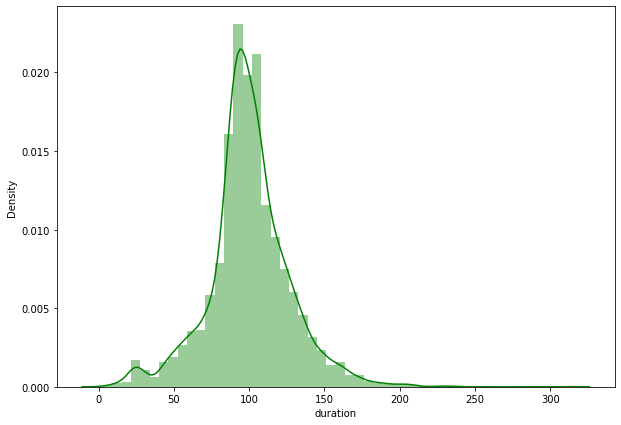

In [47]:
import seaborn as sns
fig = plt.figure(figsize=(10,7))
sns.distplot(netflix[netflix["type"]=="Movie"]["duration"], color = 'g')
#we can have a look that distribution of durtion of movies is a normal distribution.

1     1781
2      444
3      223
4      110
5       69
6       33
7       22
8       19
10      10
9        8
11       3
12       3
15       3
13       2
16       1
Name: duration, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


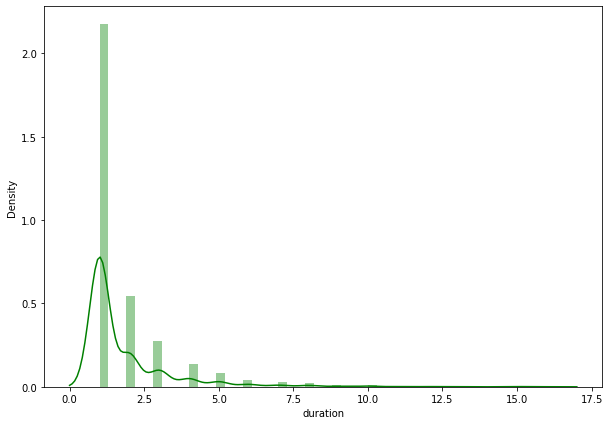

In [48]:
print(netflix[netflix["type"]=="TV Show"]["duration"].value_counts())
fig = plt.figure(figsize=(10,7))
sns.distplot(netflix[netflix["type"]=="TV Show"]["duration"], color = 'g')
#we can have a look that distribution of durtion of movies is a right skewed distribution.

###listed_in

In [49]:
netflix["listed_in"]=[nlp_of_text(x) for x in netflix["listed_in"]]

###description 

In [50]:
netflix["description"]=[nlp_of_text(x) for x in netflix["description"]]

##Feature Engineering

In [52]:
netflix.columns   #list of all the columns we have

Index(['type', 'title', 'country', 'release_year', 'rating', 'duration',
       'listed_in', 'description', 'year_added', 'month_added', 'titel'],
      dtype='object')

In [ ]:
netflix.columns   #list of all the columns we have